# setup 

In [ ]:
import os

path = "/kaggle/input/main-cotun-dataset1"

count = 0
for root, _, files in os.walk(path):
    for f in files:
        print(os.path.join(root, f))
        count += 1
        if count >= 10:   
            break
    if count >= 10:
        break

/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus310.JPG
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus207.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus367.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus300.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus140.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus68.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus362.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus374.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus290.jpg
/kaggle/input/main-cotun-dataset1/cotton/fussarium_wilt/fus106.jpg


In [ ]:
import os

path = "/kaggle/input/main-cotun-dataset1"

print(" Dataset root path:", path)
print("\n Contents inside dataset folder:")


for item in os.listdir(path):
    item_path = os.path.join(path, item)
    if os.path.isdir(item_path):
        print(f"    {item}/")
    else:
        print(f"    {item}")

📂 Dataset root path: /kaggle/input/main-cotun-dataset1

📑 Contents inside dataset folder:
   📁 cotton/


In [3]:
import os

base = "/kaggle/input/main-cotun-dataset1"

print("Contents of base dataset folder:")
for item in os.listdir(base):
    print("   ", item)


Contents of base dataset folder:
    cotton


In [ ]:
import os, glob

# Root path
base = "/kaggle/input/main-cotun-dataset1"
dataset_path = os.path.join(base, "cotton")   

print("📂 Path to Dataset folder:", dataset_path)

# class subfolders
for subdir in sorted(os.listdir(dataset_path)):
    subpath = os.path.join(dataset_path, subdir)
    if os.path.isdir(subpath):
        image_files = glob.glob(os.path.join(subpath, "*.jpg")) + \
                      glob.glob(os.path.join(subpath, "*.jpeg")) + \
                      glob.glob(os.path.join(subpath, "*.png"))
        print(f"   📁 {subdir}: {len(image_files)} images")

📂 Path to Dataset folder: /kaggle/input/main-cotun-dataset1/cotton
   📁 bacterial_blight: 448 images
   📁 curl_virus: 417 images
   📁 fussarium_wilt: 410 images
   📁 healthy: 425 images


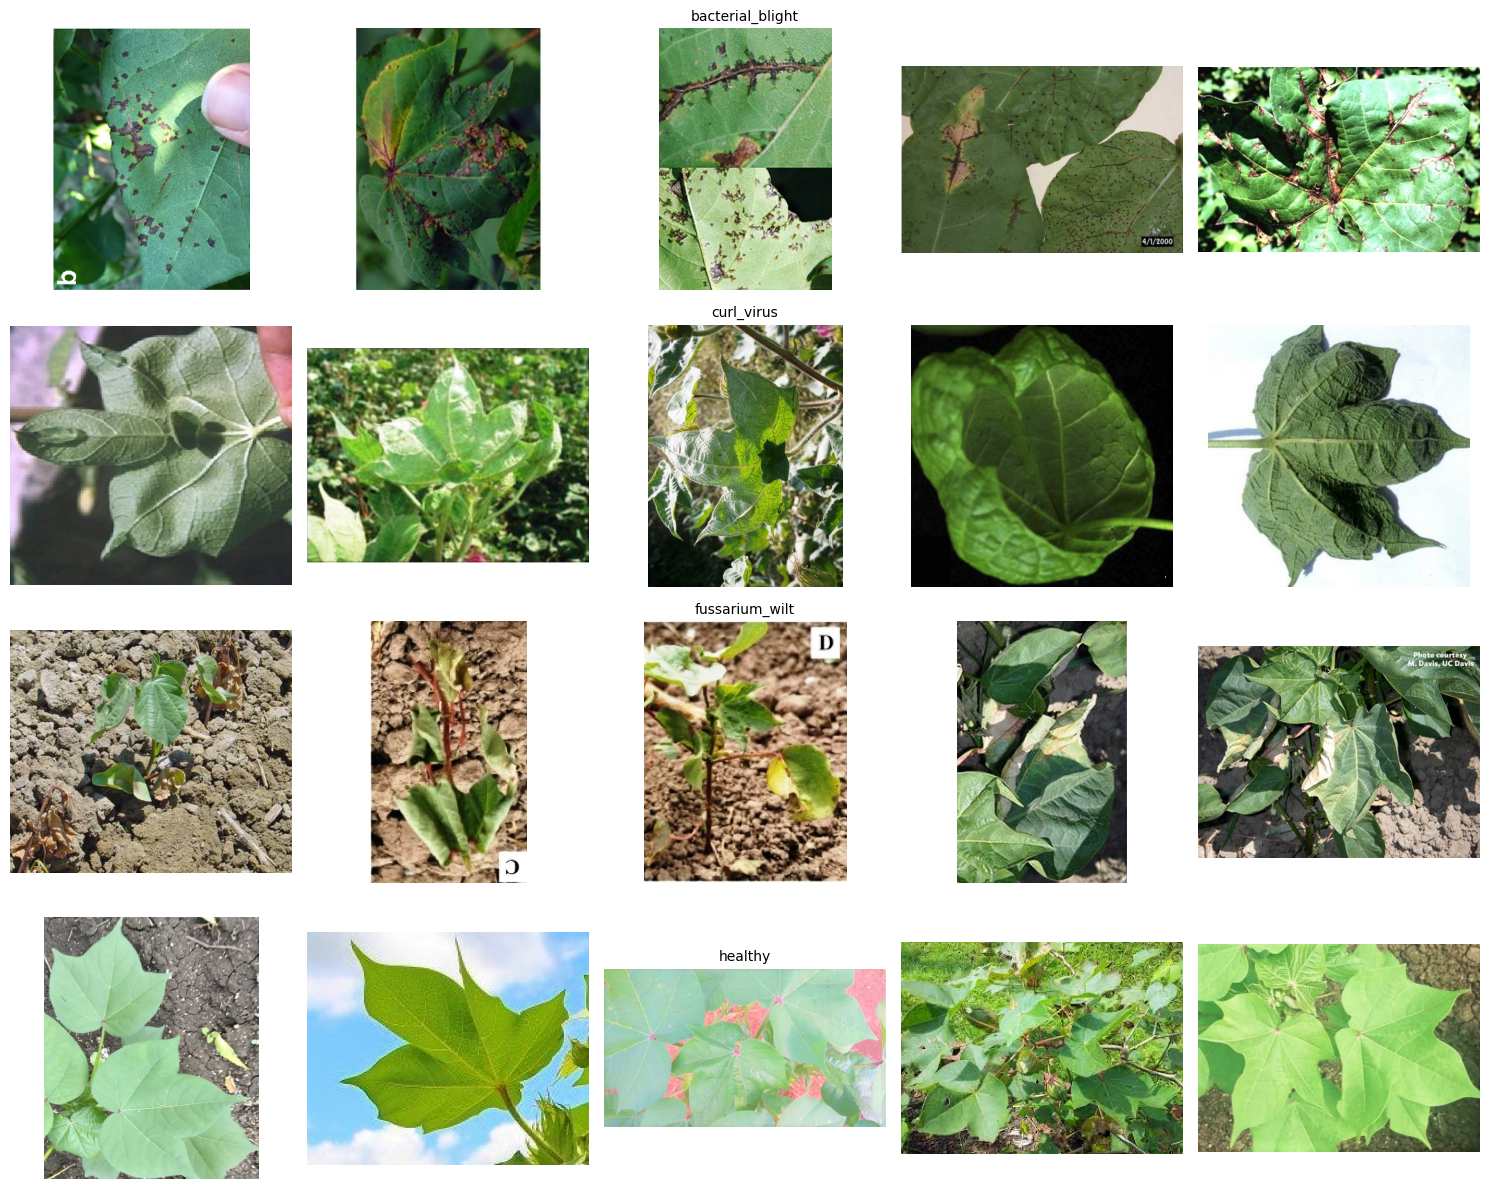

In [ ]:
import os, glob, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Dataset path
dataset_path = "/kaggle/input/main-cotun-dataset1/cotton"
classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])


def list_images(cls_path):
    exts = ("*.jpg", "*.jpeg", "*.png", "*.JPG", "*.JPEG", "*.PNG")
    files = []
    for e in exts:
        files += glob.glob(os.path.join(cls_path, e))
    return sorted(files)


fig, axes = plt.subplots(len(classes), 5, figsize=(15, 3*len(classes)))


if len(classes) == 1:
    axes = np.expand_dims(axes, 0)

for i, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    image_files = list_images(cls_path)
    if not image_files:
        
        for j in range(5):
            axes[i, j].axis("off")
        axes[i, 0].set_title(f"{cls} (no images)", fontsize=10)
        continue

    sample_files = random.sample(image_files, min(5, len(image_files)))

   
    for j in range(5):
        axes[i, j].axis("off")

    for j, img_path in enumerate(sample_files):
        try:
            img = Image.open(img_path).convert("RGB")  # Safe for JPG/PNG
            axes[i, j].imshow(np.array(img))
            axes[i, j].axis("off")
        except Exception as e:
            
            print(f" Skipping unreadable image: {img_path} ({e})")

 
    axes[i, 2].set_title(cls, fontsize=10)

plt.tight_layout()
plt.show()


# Data Preprocessing 

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


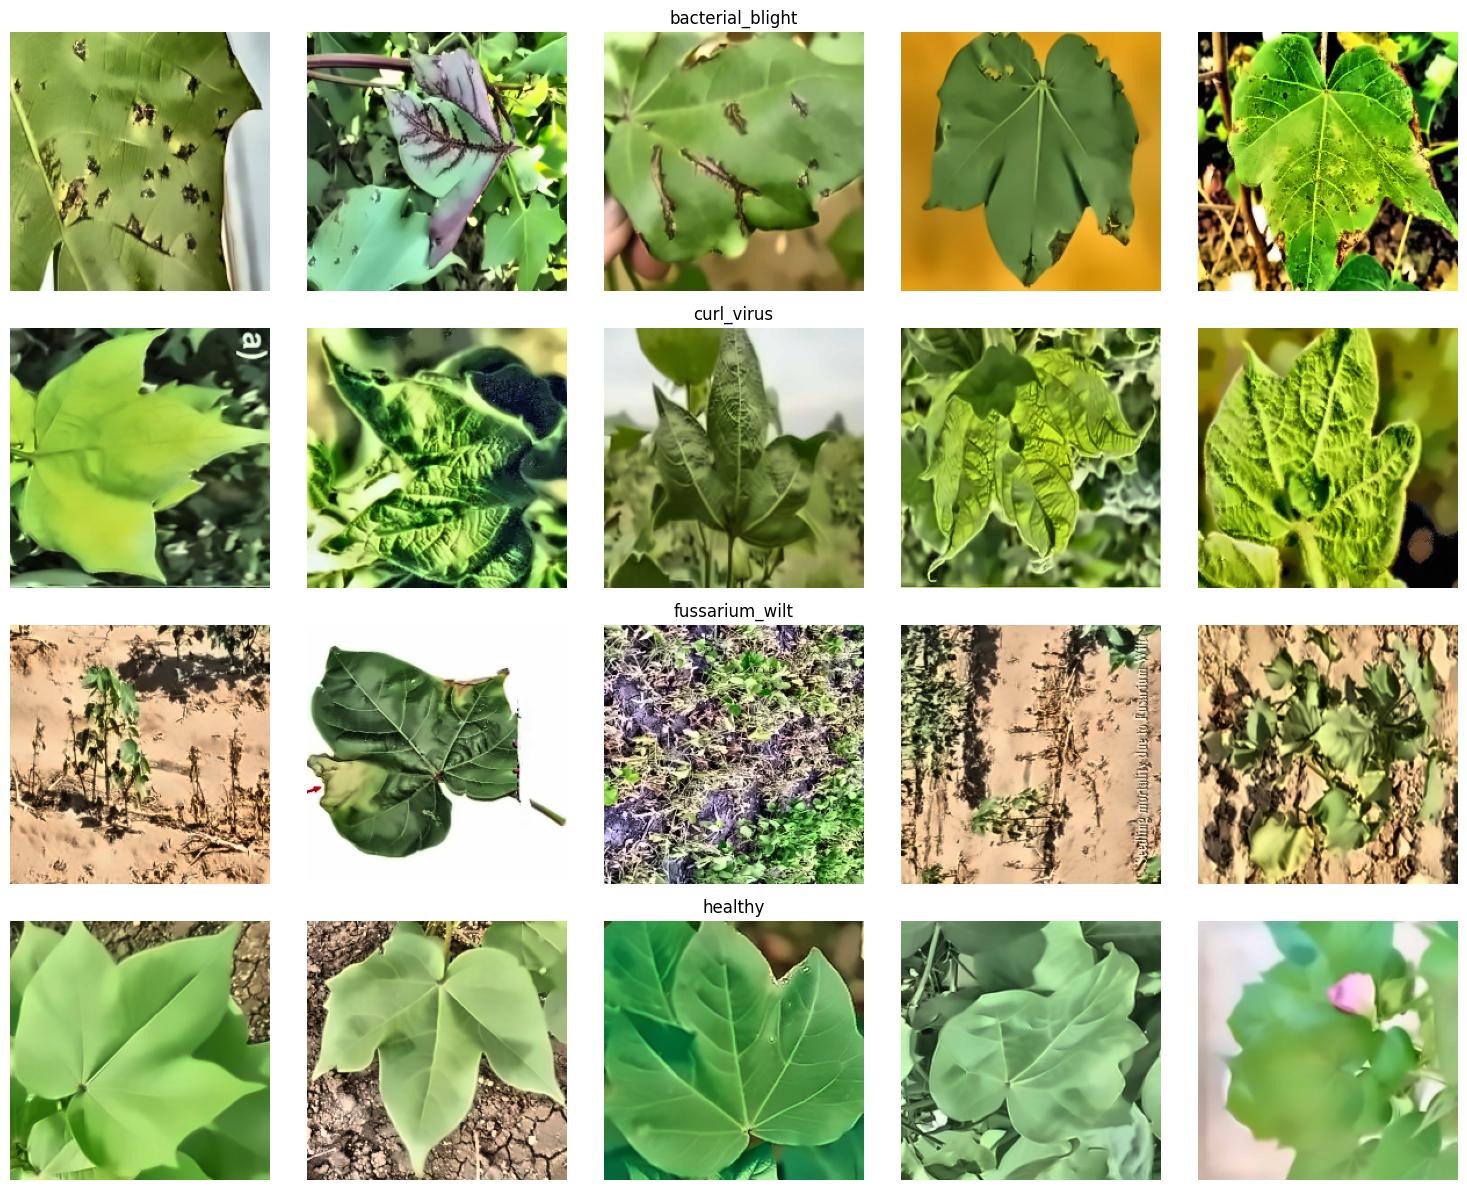

✅ Preprocessed images saved in: /kaggle/working/preprocessed_dataset
📂 Source dataset path: /kaggle/input/main-cotun-dataset1/cotton


In [ ]:
import os, glob, random
import cv2, numpy as np
import matplotlib.pyplot as plt

base = "/kaggle/input/main-cotun-dataset1"
candidates = ["cotton", "Dataset", ""]
for inner in candidates:
    test_path = os.path.join(base, inner) if inner else base
    if os.path.exists(test_path):
        input_dir = test_path
        break

output_dir = "/kaggle/working/preprocessed_dataset"
os.makedirs(output_dir, exist_ok=True)


img_size = (224, 224)
num_samples = 5


classes = sorted([d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))])
if not classes:
    raise RuntimeError(f"No class folders found under: {input_dir}")

fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 3*len(classes)))
if len(classes) == 1:
    axes = np.expand_dims(axes, 0) 

# CLAHE for contrast enhancement 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, cls in enumerate(classes):
    cls_path = os.path.join(input_dir, cls)
    save_cls_path = os.path.join(output_dir, cls)
    os.makedirs(save_cls_path, exist_ok=True)

    files = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    if not files:
        continue

    sample_files = random.sample(files, min(num_samples, len(files)))

    for file in files:
        img_path = os.path.join(cls_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            continue  

        #  Resize
        img_resized = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)

        #  CLAHE on Y channel
        yuv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2YUV)
        yuv[:, :, 0] = clahe.apply(yuv[:, :, 0])
        img_clahe = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

        # Denoise
        img_denoised = cv2.fastNlMeansDenoisingColored(
            img_clahe, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21
        )

        #  Normalize 
        img_final = (np.clip(img_denoised.astype(np.float32) / 255.0, 0, 1) * 255).astype(np.uint8)
        cv2.imwrite(os.path.join(save_cls_path, file), img_final)

        # Plot selected samples
        if file in sample_files:
            j = sample_files.index(file)
            axes[i, j].imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
            axes[i, j].axis("off")
            if j == num_samples // 2:
                axes[i, j].set_title(cls, fontsize=12)

plt.tight_layout()
plt.show()
print(" Preprocessed images saved in:", output_dir)
print(" Source dataset path:", input_dir)


# Create split folders

In [ ]:
import os
import shutil
import random

# Preprocessed dataset path
preprocessed_dir = "/kaggle/working/preprocessed_dataset"


split_base = "/kaggle/working/cotton_split"
train_dir = os.path.join(split_base, "train")
val_dir   = os.path.join(split_base, "val")
test_dir  = os.path.join(split_base, "test")

# Create split folders
for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# Split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

classes = sorted(os.listdir(preprocessed_dir))

for cls in classes:
    cls_path = os.path.join(preprocessed_dir, cls)
    files = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    random.shuffle(files)

    n_total = len(files)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)
    n_test = n_total - n_train - n_val

    splits = {
        train_dir: files[:n_train],
        val_dir: files[n_train:n_train+n_val],
        test_dir: files[n_train+n_val:]
    }

    for split_folder, split_files in splits.items():
        cls_split_path = os.path.join(split_folder, cls)
        os.makedirs(cls_split_path, exist_ok=True)
        for f in split_files:
            shutil.copy(os.path.join(cls_path, f), os.path.join(cls_split_path, f))

print(" Dataset split into 80-10-10 and saved in:", split_base)

✅ Dataset split into 80-10-10 and saved in: /kaggle/working/cotton_split


In [ ]:
import os

split_base = "/kaggle/working/cotton_split"
splits = ["train", "val", "test"]

for split in splits:
    split_path = os.path.join(split_base, split)
    print(f"\n {split.capitalize()} Split:")
    for cls in sorted(os.listdir(split_path)):
        cls_path = os.path.join(split_path, cls)
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))])
        print(f"{cls}: {num_images} images")



📂 Train Split:
bacterial_blight: 358 images
curl_virus: 333 images
fussarium_wilt: 335 images
healthy: 340 images

📂 Val Split:
bacterial_blight: 44 images
curl_virus: 41 images
fussarium_wilt: 41 images
healthy: 42 images

📂 Test Split:
bacterial_blight: 46 images
curl_virus: 43 images
fussarium_wilt: 43 images
healthy: 43 images


 # Apply augmentations

In [ ]:
import os
import cv2
import numpy as np
import random

train_dir = "/kaggle/working/cotton_split/train"
aug_train_dir = "/kaggle/working/cotton_train_aug"
os.makedirs(aug_train_dir, exist_ok=True)

# Augmentation functions
def random_flip(img):
    flip_code = random.choice([-1, 0, 1])
    return cv2.flip(img, flip_code)

def random_rotate(img):
    angle = random.uniform(-25, 25)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    return cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)

def random_zoom(img):
    zoom_factor = random.uniform(0.8, 1.2)
    h, w = img.shape[:2]
    new_h, new_w = int(h*zoom_factor), int(w*zoom_factor)
    img_resized = cv2.resize(img, (new_w, new_h))
    if zoom_factor < 1:
        pad_h = (h - new_h) // 2
        pad_w = (w - new_w) // 2
        img_padded = cv2.copyMakeBorder(img_resized, pad_h, h-new_h-pad_h,
                                        pad_w, w-new_w-pad_w, cv2.BORDER_REFLECT)
        return img_padded
    else:
        start_h = (new_h - h)//2
        start_w = (new_w - w)//2
        return img_resized[start_h:start_h+h, start_w:start_w+w]

def random_brightness(img):
    factor = random.uniform(0.7, 1.3)
    img = img.astype(np.float32) * factor
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

augmentations = [random_flip, random_rotate, random_zoom, random_brightness]

# Apply augmentations
classes = sorted(os.listdir(train_dir))
for cls in classes:
    cls_path = os.path.join(train_dir, cls)
    save_cls_path = os.path.join(aug_train_dir, cls)
    os.makedirs(save_cls_path, exist_ok=True)
    
    for file in os.listdir(cls_path):
        if not file.lower().endswith((".jpg", ".jpeg", ".png")):
            continue
        img_path = os.path.join(cls_path, file)
        img = cv2.imread(img_path)
        
       
        cv2.imwrite(os.path.join(save_cls_path, file), img)
        
        # 3 random augmentations
        for k in range(3):
            aug_img = img.copy()
            aug_funcs = random.sample(augmentations, 2)
            for func in aug_funcs:
                aug_img = func(aug_img)
            filename, ext = os.path.splitext(file)
            aug_name = f"{filename}_aug{k+1}{ext}"
            cv2.imwrite(os.path.join(save_cls_path, aug_name), aug_img)


print("\n Image count per class after augmentation:")
for cls in classes:
    cls_path = os.path.join(aug_train_dir, cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))])
    print(f"{cls}: {count} images")

print(f"\n All train images and augmented images saved in: {aug_train_dir}")


📊 Image count per class after augmentation:
bacterial_blight: 1432 images
curl_virus: 1332 images
fussarium_wilt: 1340 images
healthy: 1360 images

✅ All train images and augmented images saved in: /kaggle/working/cotton_train_aug


 # ShuffleNetV2 Model without MHSA

Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 89.6MB/s]


Epoch 1/50 | Train Loss: 1.3717, Acc: 0.5084 | Val Loss: 1.3543, Acc: 0.6845
Epoch 2/50 | Train Loss: 1.3397, Acc: 0.7290 | Val Loss: 1.3232, Acc: 0.7440
Epoch 3/50 | Train Loss: 1.3091, Acc: 0.7714 | Val Loss: 1.2929, Acc: 0.7917
Epoch 4/50 | Train Loss: 1.2790, Acc: 0.7872 | Val Loss: 1.2634, Acc: 0.8095
Epoch 5/50 | Train Loss: 1.2499, Acc: 0.8186 | Val Loss: 1.2344, Acc: 0.8333
Epoch 6/50 | Train Loss: 1.2226, Acc: 0.8263 | Val Loss: 1.2081, Acc: 0.8512
Epoch 7/50 | Train Loss: 1.1954, Acc: 0.8486 | Val Loss: 1.1789, Acc: 0.8452
Epoch 8/50 | Train Loss: 1.1698, Acc: 0.8408 | Val Loss: 1.1528, Acc: 0.8631
Epoch 9/50 | Train Loss: 1.1439, Acc: 0.8552 | Val Loss: 1.1270, Acc: 0.8690
Epoch 10/50 | Train Loss: 1.1199, Acc: 0.8593 | Val Loss: 1.1005, Acc: 0.8750
Epoch 11/50 | Train Loss: 1.0958, Acc: 0.8600 | Val Loss: 1.0738, Acc: 0.8750
Epoch 12/50 | Train Loss: 1.0720, Acc: 0.8679 | Val Loss: 1.0589, Acc: 0.8869
Epoch 13/50 | Train Loss: 1.0540, Acc: 0.8589 | Val Loss: 1.0326, Acc: 0.

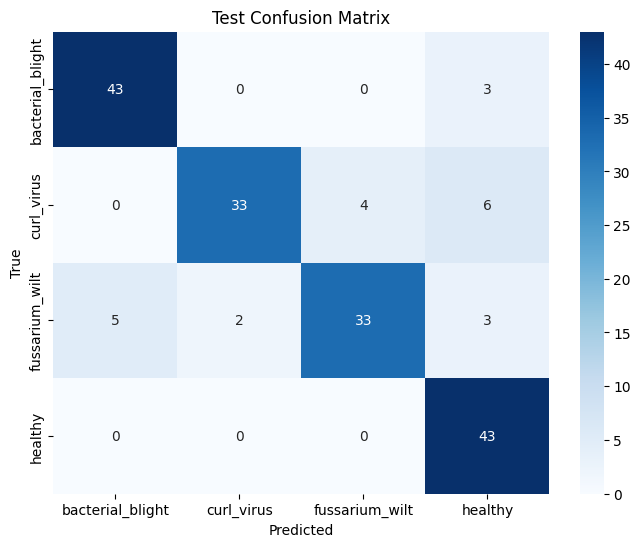


📊 Class-wise ROC AUC & PR AUC (Test):
              Class ROC AUC  PR AUC
0  bacterial_blight  0.9926  0.9806
1        curl_virus  0.9893  0.9685
2    fussarium_wilt  0.9787  0.9503
3           healthy  0.9945  0.9850
Inference time: 0.37s | Per sample: 0.0021s | GPU Mem: 25.83MB | RAM: 1600.30MB

Cohen's Kappa: 0.8247
Brier Score: 0.0690
Accuracy 95% CI: [0.1886,0.3200]
T-test class0 vs class1: stat=2.5005, p=0.0129
Mean PPV: 0.8781 | Mean NPV: 0.9581


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#  Dataset
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = train_dataset.classes
num_classes = len(class_names)


#  ShuffleNetV2 Model (No MHSA)
class ShuffleNetV2(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.shufflenet_v2_x1_0(weights=models.ShuffleNet_V2_X1_0_Weights.DEFAULT)
        if freeze_backbone:
            for param in self.backbone.parameters():
                param.requires_grad = False
        self.backbone.fc = nn.Identity()  # remove original fc
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        features = self.backbone(x)          # [B, 1024]
        features = features.unsqueeze(-1).unsqueeze(-1)  # [B, 1024, 1, 1]
        out = self.classifier(features)
        return out


#  Instantiate model, criterion, optimizer
model = ShuffleNetV2(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


#  Training loop
num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0
train_start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_shufflenetv2.pth')
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping triggered")
            break

train_time = time.time() - train_start_time
print(f"\n Training complete. Total time: {train_time:.2f}s")


#  Load best model
model.load_state_dict(torch.load('best_shufflenetv2.pth'))
model.eval()


#  Prediction helper
def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)


#  Classification Reports
print("\n Train Classification Report:")
print(classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Classification Report:")
print(classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Classification Report:")
print(classification_report(test_labels, test_preds, target_names=class_names, digits=4))


# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


#  ROC & PR AUC
test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
auc_df = pd.DataFrame({"Class": class_names, "ROC AUC": [f"{x:.4f}" for x in roc_auc_list], "PR AUC": [f"{x:.4f}" for x in pr_auc_list]})
print("\n Class-wise ROC AUC & PR AUC (Test):")
print(auc_df)


#  Inference time & memory
start_inf = time.time(); _ = get_preds(test_loader)
inf_time = time.time()-start_inf
inf_time_per_sample = inf_time / len(test_dataset)
mem_usage = torch.cuda.memory_allocated()/1024**2 if torch.cuda.is_available() else 0
ram_usage = psutil.virtual_memory().used/1024**2
print(f"Inference time: {inf_time:.2f}s | Per sample: {inf_time_per_sample:.4f}s | GPU Mem: {mem_usage:.2f}MB | RAM: {ram_usage:.2f}MB")


#  Kappa, Brier, PPV, NPV, Accuracy CI, T-test
kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())
n_samples = len(test_labels)
boot_acc = [np.mean(test_labels[np.random.choice(n_samples, n_samples)] == test_preds[np.random.choice(n_samples, n_samples)]) for _ in range(1000)]
ci_low, ci_high = np.percentile(boot_acc, [2.5,97.5])
ttest_res = ttest_ind(test_probs[:,0], test_probs[:,1])
cm = confusion_matrix(test_labels, test_preds)
TP = np.diag(cm); FP = cm.sum(axis=0)-TP; FN = cm.sum(axis=1)-TP; TN = cm.sum()-(TP+FP+FN)
PPV = TP/(TP+FP+1e-8); NPV=TN/(TN+FN+1e-8)
print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f},{ci_high:.4f}]")
print(f"T-test class0 vs class1: stat={ttest_res.statistic:.4f}, p={ttest_res.pvalue:.4f}")
print(f"Mean PPV: {np.mean(PPV):.4f} | Mean NPV: {np.mean(NPV):.4f}")


Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:00<00:00, 64.1MB/s]


Epoch 1/50 | Train Loss: 1.4250, Acc: 0.4713 | Val Loss: 0.7644, Acc: 0.7083
Epoch 2/50 | Train Loss: 0.8188, Acc: 0.6911 | Val Loss: 0.4885, Acc: 0.8155
Epoch 3/50 | Train Loss: 0.6242, Acc: 0.7659 | Val Loss: 0.3738, Acc: 0.8750
Epoch 4/50 | Train Loss: 0.5096, Acc: 0.8141 | Val Loss: 0.3000, Acc: 0.9107
Epoch 5/50 | Train Loss: 0.4470, Acc: 0.8360 | Val Loss: 0.2503, Acc: 0.9405
Epoch 6/50 | Train Loss: 0.3797, Acc: 0.8662 | Val Loss: 0.2295, Acc: 0.9524
Epoch 7/50 | Train Loss: 0.3477, Acc: 0.8772 | Val Loss: 0.1961, Acc: 0.9524
Epoch 8/50 | Train Loss: 0.3274, Acc: 0.8818 | Val Loss: 0.1784, Acc: 0.9524
Epoch 9/50 | Train Loss: 0.2979, Acc: 0.8939 | Val Loss: 0.1774, Acc: 0.9524
Epoch 10/50 | Train Loss: 0.2772, Acc: 0.9046 | Val Loss: 0.1468, Acc: 0.9643
Epoch 11/50 | Train Loss: 0.2594, Acc: 0.9114 | Val Loss: 0.1381, Acc: 0.9643
Epoch 12/50 | Train Loss: 0.2513, Acc: 0.9120 | Val Loss: 0.1348, Acc: 0.9762
Epoch 13/50 | Train Loss: 0.2301, Acc: 0.9231 | Val Loss: 0.1271, Acc: 0.

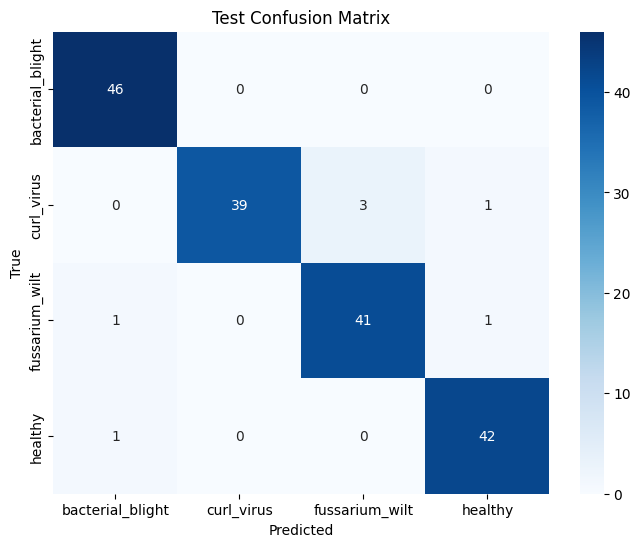


📊 ROC & PR AUC (per class):
              Class   ROC AUC    PR AUC
0  bacterial_blight  0.999663  0.999094
1        curl_virus  0.997005  0.991637
2    fussarium_wilt  0.998238  0.994780
3           healthy  0.999471  0.998426

Cohen's Kappa: 0.9466
Brier Score: 0.0159
Accuracy 95% CI: [0.9257, 0.9829]
Mean PPV (Precision): 0.9612
Mean NPV: 0.9869


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#  Dataset
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


#  SqueezeNet (No MHSA)
class SqueezeNet(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.squeezenet1_1(weights=models.SqueezeNet1_1_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
        self.features = self.backbone.features
        last_channels = 512
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(last_channels, num_classes)
        )

    def forward(self, x):
        features = self.features(x)
        out = self.classifier(features)
        return out


#  Instantiate model, criterion, optimizer
model = SqueezeNet(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


#  Training loop
num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_squeezenet.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping!")
            break


#  Load best model
model.load_state_dict(torch.load("best_squeezenet.pth"))
model.eval()


# Prediction helper
def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)


#  Classification Reports
print("\n📄 Train Report:\n", classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n📄 Validation Report:\n", classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n📄 Test Report:\n", classification_report(test_labels, test_preds, target_names=class_names, digits=4))


# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


#  ROC & PR AUC
test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
print("\n📊 ROC & PR AUC (per class):")
print(pd.DataFrame({"Class": class_names, "ROC AUC": roc_auc_list, "PR AUC": pr_auc_list}))


#  Extra Metrics
kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())

# Bootstrap Accuracy CI
n_samples = len(test_labels)
boot_acc = []
rng = np.random.default_rng()
for _ in range(1000):
    idx = rng.integers(0, n_samples, n_samples)
    boot_acc.append(np.mean(test_labels[idx] == test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5, 97.5])

# Confusion matrix components
cm = confusion_matrix(test_labels, test_preds)
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

PPV = TP / (TP + FP + 1e-8)  # Precision
NPV = TN / (TN + FN + 1e-8)

print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Mean PPV (Precision): {np.mean(PPV):.4f}")
print(f"Mean NPV: {np.mean(NPV):.4f}")


# VGG19 Standard Model

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 184MB/s]


Epoch 1/50 | Train Loss: 1.2581, Acc: 0.4874 | Val Loss: 1.1128, Acc: 0.7619
Epoch 2/50 | Train Loss: 1.0555, Acc: 0.7416 | Val Loss: 0.9340, Acc: 0.8393
Epoch 3/50 | Train Loss: 0.9084, Acc: 0.8260 | Val Loss: 0.8016, Acc: 0.8810
Epoch 4/50 | Train Loss: 0.8072, Acc: 0.8452 | Val Loss: 0.7061, Acc: 0.9048
Epoch 5/50 | Train Loss: 0.7256, Acc: 0.8561 | Val Loss: 0.6313, Acc: 0.9226
Epoch 6/50 | Train Loss: 0.6629, Acc: 0.8653 | Val Loss: 0.5755, Acc: 0.9167
Epoch 7/50 | Train Loss: 0.6200, Acc: 0.8679 | Val Loss: 0.5285, Acc: 0.9107
Epoch 8/50 | Train Loss: 0.5811, Acc: 0.8735 | Val Loss: 0.4931, Acc: 0.9226
Epoch 9/50 | Train Loss: 0.5471, Acc: 0.8746 | Val Loss: 0.4616, Acc: 0.9286
Epoch 10/50 | Train Loss: 0.5207, Acc: 0.8779 | Val Loss: 0.4357, Acc: 0.9345
Epoch 11/50 | Train Loss: 0.4950, Acc: 0.8852 | Val Loss: 0.4114, Acc: 0.9286
Epoch 12/50 | Train Loss: 0.4753, Acc: 0.8847 | Val Loss: 0.3921, Acc: 0.9286
Epoch 13/50 | Train Loss: 0.4585, Acc: 0.8920 | Val Loss: 0.3749, Acc: 0.

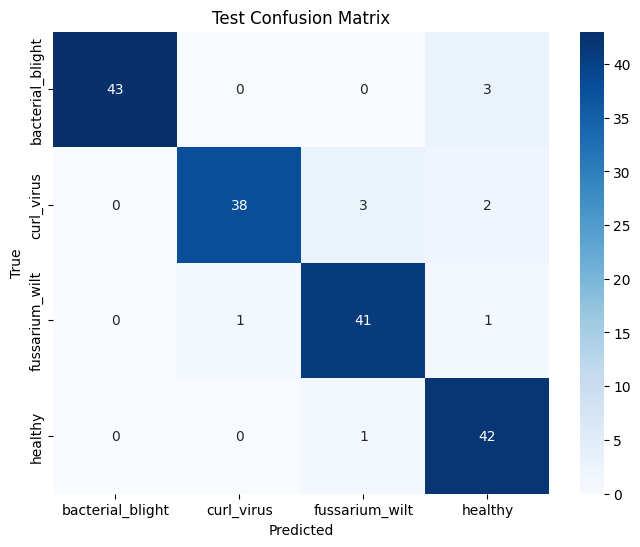


📊 ROC & PR AUC (per class):
              Class   ROC AUC    PR AUC
0  bacterial_blight  0.998652  0.996536
1        curl_virus  0.991367  0.981216
2    fussarium_wilt  0.993129  0.976306
3           healthy  0.998414  0.995542

Cohen's Kappa: 0.9162
Brier Score: 0.0249
Accuracy 95% CI: [0.8971, 0.9714]
Mean PPV (Precision): 0.9401
Mean NPV: 0.9793


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


#  VGG19 Standard Model
class VGG19_Model(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.vgg19(weights=models.VGG19_Weights.DEFAULT).features
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
        last_channels = 512
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(last_channels, num_classes)
        )

    def forward(self, x):
        features = self.backbone(x)
        out = self.classifier(features)
        return out


# Model, criterion, optimizer
model = VGG19_Model(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


#  Training loop
num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_vgg19.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping!")
            break


model.load_state_dict(torch.load("best_vgg19.pth"))
model.eval()


def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)


print("\n Train Report:\n", classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Report:\n", classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Report:\n", classification_report(test_labels, test_preds, target_names=class_names, digits=4))


cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
print("\n ROC & PR AUC (per class):")
print(pd.DataFrame({"Class": class_names, "ROC AUC": roc_auc_list, "PR AUC": pr_auc_list}))


kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())

# Bootstrap Accuracy CI
n_samples = len(test_labels)
boot_acc = []
rng = np.random.default_rng()
for _ in range(1000):
    idx = rng.integers(0, n_samples, n_samples)
    boot_acc.append(np.mean(test_labels[idx] == test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5, 97.5])

# Confusion matrix components
cm = confusion_matrix(test_labels, test_preds)
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

PPV = TP / (TP + FP + 1e-8)  
NPV = TN / (TN + FN + 1e-8)

print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Mean PPV (Precision): {np.mean(PPV):.4f}")
print(f"Mean NPV: {np.mean(NPV):.4f}")


 # ResNet101 Standard Model

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 176MB/s]


Epoch 1/50 | Train Loss: 1.1506, Acc: 0.6294 | Val Loss: 0.9374, Acc: 0.8690
Epoch 2/50 | Train Loss: 0.8263, Acc: 0.8307 | Val Loss: 0.7253, Acc: 0.8869
Epoch 3/50 | Train Loss: 0.6674, Acc: 0.8523 | Val Loss: 0.5840, Acc: 0.9048
Epoch 4/50 | Train Loss: 0.5669, Acc: 0.8785 | Val Loss: 0.5131, Acc: 0.9048
Epoch 5/50 | Train Loss: 0.4985, Acc: 0.8884 | Val Loss: 0.4398, Acc: 0.9167
Epoch 6/50 | Train Loss: 0.4428, Acc: 0.9025 | Val Loss: 0.3853, Acc: 0.9405
Epoch 7/50 | Train Loss: 0.4004, Acc: 0.9103 | Val Loss: 0.3448, Acc: 0.9405
Epoch 8/50 | Train Loss: 0.3716, Acc: 0.9189 | Val Loss: 0.3160, Acc: 0.9524
Epoch 9/50 | Train Loss: 0.3414, Acc: 0.9279 | Val Loss: 0.2854, Acc: 0.9464
Epoch 10/50 | Train Loss: 0.3195, Acc: 0.9308 | Val Loss: 0.2702, Acc: 0.9524
Epoch 11/50 | Train Loss: 0.2981, Acc: 0.9345 | Val Loss: 0.2407, Acc: 0.9524
Epoch 12/50 | Train Loss: 0.2838, Acc: 0.9378 | Val Loss: 0.2455, Acc: 0.9583
Epoch 13/50 | Train Loss: 0.2597, Acc: 0.9449 | Val Loss: 0.2127, Acc: 0.

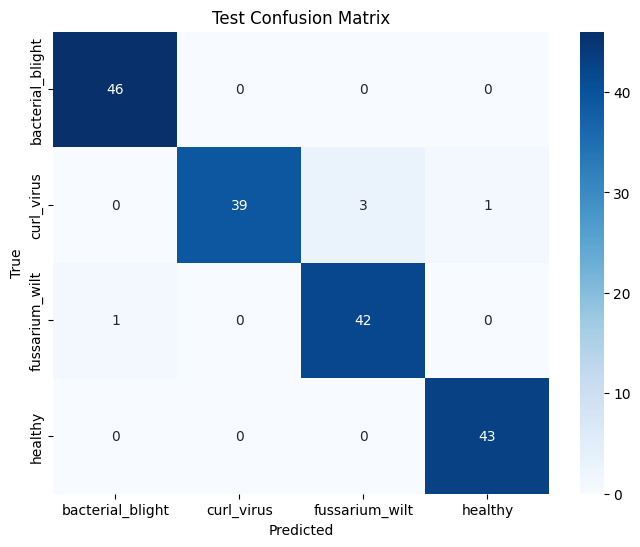


📊 ROC & PR AUC (per class):
              Class   ROC AUC    PR AUC
0  bacterial_blight  1.000000  1.000000
1        curl_virus  0.995419  0.989551
2    fussarium_wilt  0.999295  0.998021
3           healthy  0.998238  0.994081

Cohen's Kappa: 0.9619
Brier Score: 0.0120
Accuracy 95% CI: [0.9486, 0.9943]
Mean PPV (Precision): 0.9723
Mean NPV: 0.9907


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


#  ResNet101 Standard Model
class ResNet101_Model(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
        # Replace the classifier
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

model = ResNet101_Model(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_resnet101.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping!")
            break


model.load_state_dict(torch.load("best_resnet101.pth"))
model.eval()


def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)



print("\n Train Report:\n", classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Report:\n", classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Report:\n", classification_report(test_labels, test_preds, target_names=class_names, digits=4))


cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
print("\n📊 ROC & PR AUC (per class):")
print(pd.DataFrame({"Class": class_names, "ROC AUC": roc_auc_list, "PR AUC": pr_auc_list}))


kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())

# Bootstrap Accuracy CI
n_samples = len(test_labels)
boot_acc = []
rng = np.random.default_rng()
for _ in range(1000):
    idx = rng.integers(0, n_samples, n_samples)
    boot_acc.append(np.mean(test_labels[idx] == test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5, 97.5])

# Confusion matrix components
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

PPV = TP / (TP + FP + 1e-8)
NPV = TN / (TN + FN + 1e-8)

print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Mean PPV (Precision): {np.mean(PPV):.4f}")
print(f"Mean NPV: {np.mean(NPV):.4f}")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 115MB/s] 


Epoch 1/50 | Train Loss: 1.1973, Acc: 0.5930 | Val Loss: 1.0132, Acc: 0.7738
Epoch 2/50 | Train Loss: 0.9133, Acc: 0.8228 | Val Loss: 0.7972, Acc: 0.8631
Epoch 3/50 | Train Loss: 0.7434, Acc: 0.8583 | Val Loss: 0.6595, Acc: 0.8869
Epoch 4/50 | Train Loss: 0.6340, Acc: 0.8721 | Val Loss: 0.5633, Acc: 0.9048
Epoch 5/50 | Train Loss: 0.5603, Acc: 0.8809 | Val Loss: 0.4830, Acc: 0.9048
Epoch 6/50 | Train Loss: 0.5059, Acc: 0.8887 | Val Loss: 0.4441, Acc: 0.9286
Epoch 7/50 | Train Loss: 0.4634, Acc: 0.8957 | Val Loss: 0.3974, Acc: 0.9405
Epoch 8/50 | Train Loss: 0.4285, Acc: 0.9032 | Val Loss: 0.3602, Acc: 0.9405
Epoch 9/50 | Train Loss: 0.4028, Acc: 0.9068 | Val Loss: 0.3342, Acc: 0.9405
Epoch 10/50 | Train Loss: 0.3739, Acc: 0.9140 | Val Loss: 0.3148, Acc: 0.9405
Epoch 11/50 | Train Loss: 0.3519, Acc: 0.9206 | Val Loss: 0.3026, Acc: 0.9405
Epoch 12/50 | Train Loss: 0.3344, Acc: 0.9262 | Val Loss: 0.2736, Acc: 0.9583
Epoch 13/50 | Train Loss: 0.3283, Acc: 0.9178 | Val Loss: 0.2731, Acc: 0.

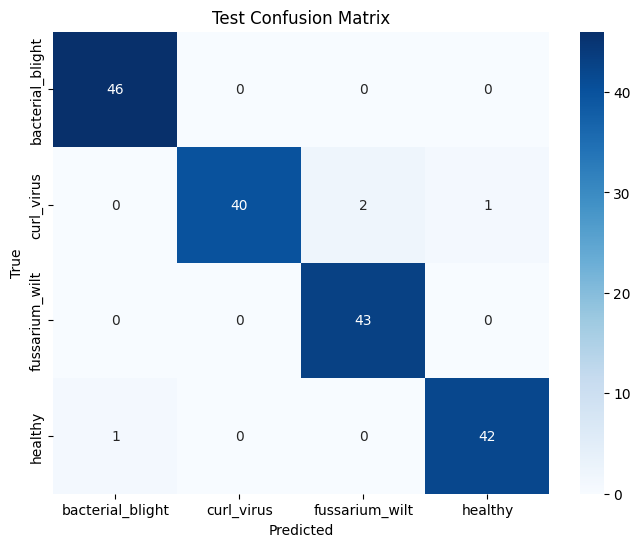


📊 ROC & PR AUC (per class):
              Class   ROC AUC    PR AUC
0  bacterial_blight  1.000000  1.000000
1        curl_virus  0.998591  0.996352
2    fussarium_wilt  0.999295  0.997872
3           healthy  0.998414  0.995181

Cohen's Kappa: 0.9695
Brier Score: 0.0140
Accuracy 95% CI: [0.9543, 0.9943]
Mean PPV (Precision): 0.9778
Mean NPV: 0.9926


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


#  MobileNetV2 Standard Model
class MobileNetV2_Model(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)


#  Instantiate model, criterion, optimizer
model = MobileNetV2_Model(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_mobilenetv2.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping!")
            break


model.load_state_dict(torch.load("best_mobilenetv2.pth"))
model.eval()


def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)


print("\n Train Report:\n", classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Report:\n", classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Report:\n", classification_report(test_labels, test_preds, target_names=class_names, digits=4))


cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
print("\n ROC & PR AUC (per class):")
print(pd.DataFrame({"Class": class_names, "ROC AUC": roc_auc_list, "PR AUC": pr_auc_list}))


kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())

# Bootstrap Accuracy CI
n_samples = len(test_labels)
boot_acc = []
rng = np.random.default_rng()
for _ in range(1000):
    idx = rng.integers(0, n_samples, n_samples)
    boot_acc.append(np.mean(test_labels[idx] == test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5, 97.5])

# Confusion matrix components
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

PPV = TP / (TP + FP + 1e-8)
NPV = TN / (TN + FN + 1e-8)

print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Mean PPV (Precision): {np.mean(PPV):.4f}")
print(f"Mean NPV: {np.mean(NPV):.4f}")


# EfficientNet-B0 without MHSA

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 134MB/s] 


Epoch 1/50 | Train Loss: 1.2001, Acc: 0.5542 | Val Loss: 0.9887, Acc: 0.7917
Epoch 2/50 | Train Loss: 0.8825, Acc: 0.8126 | Val Loss: 0.7455, Acc: 0.8869
Epoch 3/50 | Train Loss: 0.7011, Acc: 0.8532 | Val Loss: 0.5884, Acc: 0.9167
Epoch 4/50 | Train Loss: 0.5908, Acc: 0.8693 | Val Loss: 0.5028, Acc: 0.8929
Epoch 5/50 | Train Loss: 0.5160, Acc: 0.8827 | Val Loss: 0.4320, Acc: 0.9167
Epoch 6/50 | Train Loss: 0.4608, Acc: 0.8957 | Val Loss: 0.3867, Acc: 0.9405
Epoch 7/50 | Train Loss: 0.4207, Acc: 0.8986 | Val Loss: 0.3477, Acc: 0.9405
Epoch 8/50 | Train Loss: 0.3905, Acc: 0.9076 | Val Loss: 0.3130, Acc: 0.9345
Epoch 9/50 | Train Loss: 0.3724, Acc: 0.9116 | Val Loss: 0.2888, Acc: 0.9405
Epoch 10/50 | Train Loss: 0.3441, Acc: 0.9206 | Val Loss: 0.2789, Acc: 0.9405
Epoch 11/50 | Train Loss: 0.3276, Acc: 0.9182 | Val Loss: 0.2491, Acc: 0.9464
Epoch 12/50 | Train Loss: 0.3074, Acc: 0.9230 | Val Loss: 0.2362, Acc: 0.9524
Epoch 13/50 | Train Loss: 0.2978, Acc: 0.9237 | Val Loss: 0.2290, Acc: 0.

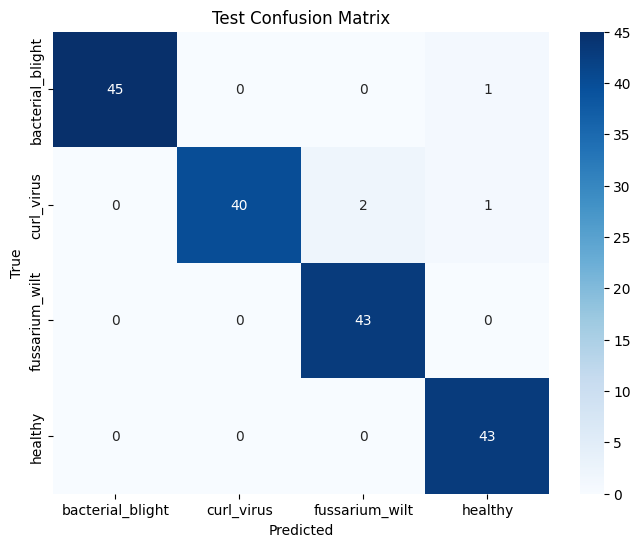


📊 ROC & PR AUC (per class):
              Class   ROC AUC    PR AUC
0  bacterial_blight  0.999663  0.999065
1        curl_virus  1.000000  1.000000
2    fussarium_wilt  0.999648  0.998931
3           healthy  0.999648  0.998966

Cohen's Kappa: 0.9695
Brier Score: 0.0103
Accuracy 95% CI: [0.9541, 1.0000]
Mean PPV (Precision): 0.9778
Mean NPV: 0.9925


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


#  EfficientNet-B0 without MHSA
class EfficientNetB0(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
        self.features = self.backbone.features
        last_channels = 1280
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(last_channels, num_classes)
        )

    def forward(self, x):
        features = self.features(x)
        out = self.classifier(features)
        return out


model = EfficientNetB0(num_classes=num_classes, dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)


num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_efficientnetb0.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print("Early stopping!")
            break


model.load_state_dict(torch.load("best_efficientnetb0.pth"))
model.eval()


def get_preds(loader):
    labels_list, preds_list, probs_list = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            probs_list.extend(probs.cpu().numpy())
    return np.array(labels_list), np.array(preds_list), np.array(probs_list)

train_labels, train_preds, train_probs = get_preds(train_loader)
val_labels, val_preds, val_probs       = get_preds(val_loader)
test_labels, test_preds, test_probs    = get_preds(test_loader)


print("\n Train Report:\n", classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Report:\n", classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Report:\n", classification_report(test_labels, test_preds, target_names=class_names, digits=4))


cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()


test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
print("\n ROC & PR AUC (per class):")
print(pd.DataFrame({"Class": class_names, "ROC AUC": roc_auc_list, "PR AUC": pr_auc_list}))


kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())

# Bootstrap Accuracy CI
n_samples = len(test_labels)
boot_acc = []
rng = np.random.default_rng()
for _ in range(1000):
    idx = rng.integers(0, n_samples, n_samples)
    boot_acc.append(np.mean(test_labels[idx] == test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5, 97.5])

# Confusion matrix components
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

PPV = TP / (TP + FP + 1e-8)
NPV = TN / (TN + FN + 1e-8)

print(f"\nCohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Accuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Mean PPV (Precision): {np.mean(PPV):.4f}")
print(f"Mean NPV: {np.mean(NPV):.4f}")


#  ENSEMBLE PREDICTION

[Model 1] Epoch 1/50 | Train Loss: 1.6462, Acc: 0.3734 | Val Loss: 0.8114, Acc: 0.6845
[Model 1] Epoch 2/50 | Train Loss: 0.9592, Acc: 0.6219 | Val Loss: 0.4947, Acc: 0.8095
[Model 1] Epoch 3/50 | Train Loss: 0.6977, Acc: 0.7376 | Val Loss: 0.3729, Acc: 0.8690
[Model 1] Epoch 4/50 | Train Loss: 0.5954, Acc: 0.7809 | Val Loss: 0.3004, Acc: 0.8869
[Model 1] Epoch 5/50 | Train Loss: 0.5112, Acc: 0.8168 | Val Loss: 0.2540, Acc: 0.9286
[Model 1] Epoch 6/50 | Train Loss: 0.4718, Acc: 0.8309 | Val Loss: 0.2265, Acc: 0.9226
[Model 1] Epoch 7/50 | Train Loss: 0.4299, Acc: 0.8430 | Val Loss: 0.2098, Acc: 0.9226
[Model 1] Epoch 8/50 | Train Loss: 0.4066, Acc: 0.8583 | Val Loss: 0.1815, Acc: 0.9405
[Model 1] Epoch 9/50 | Train Loss: 0.3701, Acc: 0.8726 | Val Loss: 0.1769, Acc: 0.9345
[Model 1] Epoch 10/50 | Train Loss: 0.3592, Acc: 0.8743 | Val Loss: 0.1704, Acc: 0.9345
[Model 1] Epoch 11/50 | Train Loss: 0.3399, Acc: 0.8759 | Val Loss: 0.1527, Acc: 0.9524
[Model 1] Epoch 12/50 | Train Loss: 0.337

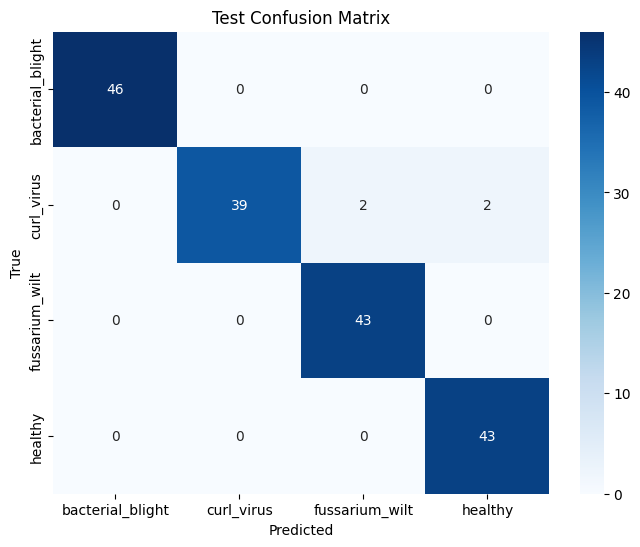


📊 Class-wise ROC & PR AUC:
              Class ROC AUC  PR AUC
0  bacterial_blight  1.0000  1.0000
1        curl_virus  0.9984  0.9957
2    fussarium_wilt  0.9982  0.9941
3           healthy  1.0000  1.0000

Accuracy 95% CI: [0.9543, 0.9943]
Cohen's Kappa: 0.9695
Brier Score: 0.0248
Mean PPV: 0.9778 | Mean NPV: 0.9926
T-test class0 vs class1: stat=0.9946, p=0.3206


In [ ]:
import os, time, psutil
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, brier_score_loss
from sklearn.metrics import roc_auc_score, average_precision_score
from scipy.stats import ttest_ind

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_transform_aug = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

eval_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=train_transform_aug)
train_eval_dataset = datasets.ImageFolder('/kaggle/working/cotton_train_aug', transform=eval_transform)
val_dataset   = datasets.ImageFolder('/kaggle/working/cotton_split/val', transform=eval_transform)
test_dataset  = datasets.ImageFolder('/kaggle/working/cotton_split/test', transform=eval_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_eval_loader = DataLoader(train_eval_dataset, batch_size=32, shuffle=False)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)


# MODEL WRAPPERS WITHOUT MHSA
class SqueezeNetModel(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.squeezenet1_1(weights=models.SqueezeNet1_1_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters(): p.requires_grad = False
        self.features = self.backbone.features
        last_channels = 512
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(last_channels, num_classes)
        )
    def forward(self, x):
        f = self.features(x)
        return self.classifier(f)

class ShuffleNetV2Model(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.shufflenet_v2_x1_0(weights=models.ShuffleNet_V2_X1_0_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters(): p.requires_grad = False
        self.backbone.fc = nn.Identity()
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(1024, num_classes)
        )
    def forward(self, x):
        f = self.backbone(x).unsqueeze(-1).unsqueeze(-1)
        return self.classifier(f)

class EfficientNetB0Model(nn.Module):
    def __init__(self, num_classes, dropout=0.3, freeze_backbone=True):
        super().__init__()
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        if freeze_backbone:
            for p in self.backbone.parameters(): p.requires_grad = False
        self.backbone.classifier = nn.Identity()
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(1280, num_classes)
        )
    def forward(self, x):
        f = self.backbone.features(x)
        return self.classifier(f)

squeezenet_model = SqueezeNetModel(num_classes=num_classes).to(device)
shufflenet_model = ShuffleNetV2Model(num_classes=num_classes).to(device)
efficientnet_model = EfficientNetB0Model(num_classes=num_classes).to(device)

models_list = [squeezenet_model, shufflenet_model, efficientnet_model]

criterion = nn.CrossEntropyLoss()
optimizer_list = [optim.Adam(m.parameters(), lr=1e-4, weight_decay=1e-4) for m in models_list]
scheduler_list = [optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', patience=5) for opt in optimizer_list]


num_epochs = 50
for idx, model in enumerate(models_list):
    best_val_loss = float('inf'); patience_counter = 0
    optimizer = optimizer_list[idx]; scheduler = scheduler_list[idx]
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0,0,0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs,1)
            correct += (preds==labels).sum().item()
            total += labels.size(0)
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0,0,0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs,1)
                val_correct += (preds==labels).sum().item()
                val_total += labels.size(0)
        val_loss /= len(val_loader); val_acc=val_correct/val_total
        scheduler.step(val_loss)

        print(f"[Model {idx+1}] Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

        if val_loss<best_val_loss:
            best_val_loss=val_loss
            torch.save(model.state_dict(), f"best_model_{idx}.pth")
            patience_counter=0
        else:
            patience_counter+=1
            if patience_counter>=5:
                print("Early stopping!")
                break


# ENSEMBLE PREDICTION
def get_preds_ensemble(loader, models_list):
    probs_list=[]
    with torch.no_grad():
        for inputs, _ in loader:
            inputs = inputs.to(device)
            outputs_sum = 0
            for model in models_list:
                model.eval()
                outputs_sum += torch.softmax(model(inputs),1)
            probs_avg = outputs_sum / len(models_list)
            probs_list.append(probs_avg.cpu().numpy())
    probs_all = np.vstack(probs_list)
    preds_all = np.argmax(probs_all, axis=1)
    labels_all = np.array([y for _, y in loader.dataset])
    return labels_all, preds_all, probs_all

train_labels, train_preds, train_probs = get_preds_ensemble(train_eval_loader, models_list)
val_labels, val_preds, val_probs       = get_preds_ensemble(val_loader, models_list)
test_labels, test_preds, test_probs    = get_preds_ensemble(test_loader, models_list)


print("\n Train Classification Report:")
print(classification_report(train_labels, train_preds, target_names=class_names, digits=4))
print("\n Validation Classification Report:")
print(classification_report(val_labels, val_preds, target_names=class_names, digits=4))
print("\n Test Classification Report:")
print(classification_report(test_labels, test_preds, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Test Confusion Matrix")
plt.show()

# ROC & PR AUC
test_labels_onehot = np.eye(num_classes)[test_labels]
roc_auc_list = [roc_auc_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
pr_auc_list  = [average_precision_score(test_labels_onehot[:,i], test_probs[:,i]) for i in range(num_classes)]
auc_df = pd.DataFrame({"Class": class_names, "ROC AUC":[f"{x:.4f}" for x in roc_auc_list], "PR AUC":[f"{x:.4f}" for x in pr_auc_list]})
print("\n Class-wise ROC & PR AUC:")
print(auc_df)

# Bootstrap CI
n_samples = len(test_labels)
boot_acc = []
for _ in range(1000):
    idx = np.random.choice(n_samples, n_samples, replace=True)
    boot_acc.append(np.mean(test_labels[idx]==test_preds[idx]))
ci_low, ci_high = np.percentile(boot_acc, [2.5,97.5])
print(f"\nAccuracy 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")

# Extra Metrics
kappa = cohen_kappa_score(test_labels, test_preds)
brier = brier_score_loss(test_labels_onehot.flatten(), test_probs.flatten())
TP = np.diag(cm); FP = cm.sum(axis=0)-TP; FN = cm.sum(axis=1)-TP; TN = cm.sum()-(TP+FP+FN)
PPV = TP/(TP+FP+1e-8); NPV = TN/(TN+FN+1e-8)
ttest_res = ttest_ind(test_probs[:,0], test_probs[:,1])

print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Mean PPV: {np.mean(PPV):.4f} | Mean NPV: {np.mean(NPV):.4f}")
print(f"T-test class0 vs class1: stat={ttest_res.statistic:.4f}, p={ttest_res.pvalue:.4f}")